In [1]:
# On importe les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# On charge le dataset et on le clean pour enlever outlier et donnees erronees 
house_data = pd.read_csv('house_data.csv')
house_data = house_data[np.isnan(house_data["surface"]) == False]
house_data_full = house_data[house_data["price"] <= 10000]

Coefficient: 
 [29.44595685]
Variance score: 0.84


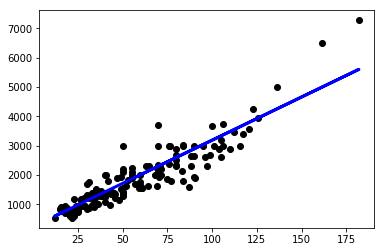

In [3]:
#1ere solution : On effectue une regression sur tout le training set en negligeant les arrondissements
priceData = house_data_full["price"]
surfaceData = house_data_full["surface"][:,np.newaxis]

#On split les arrays en training set et testing set
trainPrice, testPrice, trainSurface, testSurface = train_test_split(priceData,surfaceData, train_size=0.8)
        
 #On effectue la regression
regr = linear_model.LinearRegression()
regr.fit(trainSurface,trainPrice)
predict = regr.predict(testSurface)
        
#Affichage du coef
print('Coefficient: \n', regr.coef_)
#Variance
print('Variance score: %.2f' % r2_score(testPrice, predict))
#Affichage des droites
plt.scatter(testSurface, testPrice,  color='black')
plt.plot(testSurface, predict, color='blue', linewidth=3)
plt.show()

#La variance reste globalement entre 0,70 et 0,85

Arrondissement : 1
Coefficient: 
 [29.29796634]
Variance score: 0.74


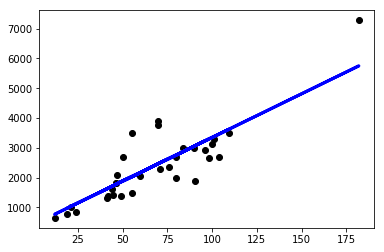

Arrondissement : 2
Coefficient: 
 [29.4356997]
Variance score: 0.91


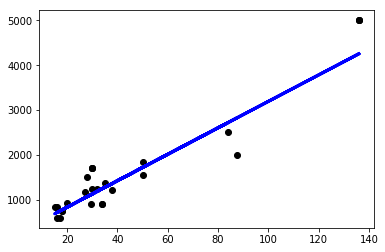

Arrondissement : 3
Coefficient: 
 [27.6329397]
Variance score: 0.90


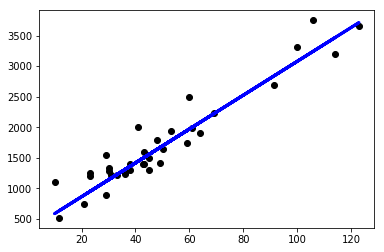

Arrondissement : 4
Coefficient: 
 [33.19517689]
Variance score: 0.69


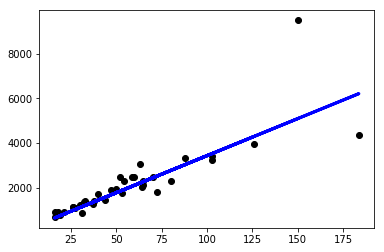

Arrondissement : 10
Coefficient: 
 [19.59807588]
Variance score: 0.96


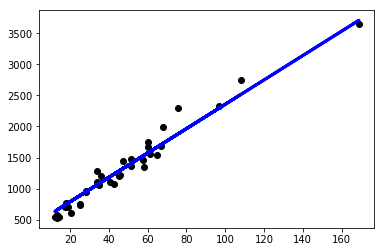

In [4]:
#2eme solution : On effectue une regression par arrondissement
for i in range(1,20):
    house_data = house_data_full[house_data_full["arrondissement"] == i ]
    if len(house_data) != 0:
        priceData = house_data["price"]
        surfaceData = house_data["surface"][:,np.newaxis]
        
        #On split les arrays en training set et testing set
        trainPrice, testPrice, trainSurface, testSurface = train_test_split(priceData,surfaceData, train_size=0.8)
        
        #On effectue la regression
        regr = linear_model.LinearRegression()
        regr.fit(trainSurface,trainPrice)
        predict = regr.predict(testSurface)
        
        #Affichage
        print("Arrondissement : %i" % i)
        #Affichage du coef
        print('Coefficient: \n', regr.coef_)
        #Variance
        print('Variance score: %.2f' % r2_score(testPrice, predict))
        #Affichage des droites
        plt.scatter(testSurface, testPrice,  color='black')
        plt.plot(testSurface, predict, color='blue', linewidth=3)
        plt.show()

#on tombe sur des variances comprises entre 0,75 et 0,95 mais dans l'ensemble ca reste plus precis aue la premiere solution

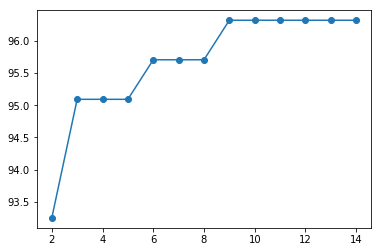

In [5]:
#3eme solution

from sklearn import neighbors

priceData = house_data_full["price"]
surfaceData = house_data_full["surface"][:,np.newaxis]

#On cherche un k assez correct
trainPrice, testPrice, trainSurface, testSurface = train_test_split(priceData,surfaceData, train_size=0.8)
errors = []
for i in range(2,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainSurface, trainPrice)
    error = 1 - knn.score(testSurface, testPrice)
    errors.append(100*error)
plt.plot(range(2,15), errors, 'o-')
plt.show()
#On tombe sur k = 4 

In [6]:
for i in range(1,20):
    house_data = house_data_full[house_data_full["arrondissement"] == i ]
    if len(house_data) != 0:
        priceData = house_data["price"]
        surfaceData = house_data["surface"][:,np.newaxis]
        
        #On split les arrays en training set et testing set
        trainPrice, testPrice, trainSurface, testSurface = train_test_split(priceData,surfaceData, train_size=0.8)
        
        #On effectue le knn avec le k choisi, ici 4
        knn = neighbors.KNeighborsClassifier(n_neighbors=4)
        knn.fit(trainSurface, trainPrice)
        predict = knn.predict(testSurface)
        #Affichage
        print("Arrondissement : %i" % i)
        #Variance
        print('Variance score: %.2f' % r2_score(testPrice, predict))
        
#On obtient des variances aui varient beaucoup trop et qui meme si ils peuvent etre assez haut euvent egalement etre assez bas
#Il vaudra donc mieux privilegier la 2eme solution beaucoup plus stable pour des scores aussi eleves

Arrondissement : 1
Variance score: 0.62
Arrondissement : 2
Variance score: 0.87
Arrondissement : 3
Variance score: 0.78
Arrondissement : 4
Variance score: 0.83
Arrondissement : 10
Variance score: 0.92
